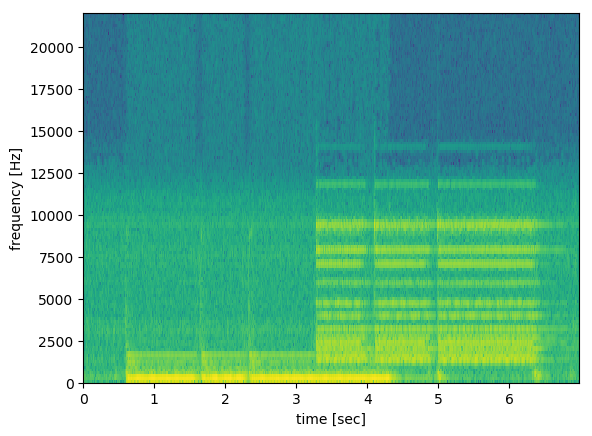

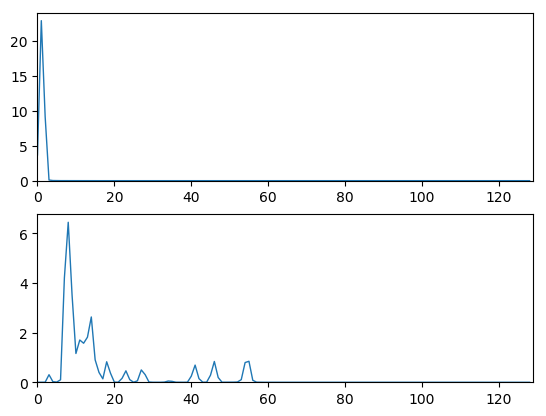

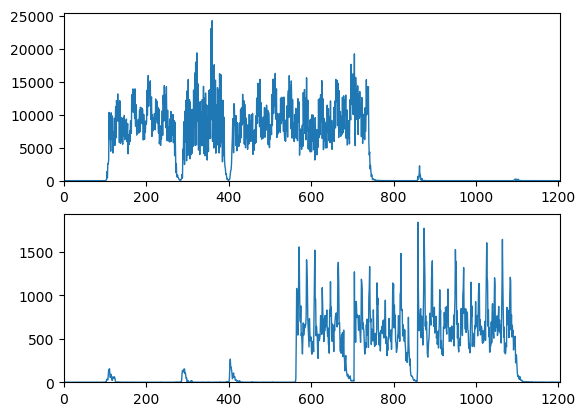

In [23]:
##############################
## Audio decomposition demo using NMF

using PyPlot, PyCall
using DataFrames
using Distributions

push!(LOAD_PATH, ".")
import NMF_module
@pyimport scipy.io.wavfile as wf

# load data
wavfile = "data/organ.wav"
fs, data = wf.read(wavfile)

figure("data")
clf()
Pxx, freqs, t, pl = specgram(data[10000:318000,2], Fs=fs, NFFT=256, noverlap=0)
xlabel("time [sec]")
ylabel("frequency [Hz]")
ylim([0,22000])

# model
D, N = size(Pxx)
K = 2
a_t = 1.0
b_t = 1.0
a_v = 1.0
b_v = 100.0
prior = NMF.NMFModel(a_t*ones(D,K), b_t*ones(D, K), a_v, b_v)

# inference
max_iter = 100
posterior, S_est, T_est, V_est = NMF.VI(Pxx, prior, max_iter)
X = T_est * V_est

# visualize
figure("T")
clf()
for k in 1 : K
    subplot(K,1,k)
    plot(T_est[:,k], linewidth=1.0)
    xlim([0, D])
    ylim([0, ylim()[2]])
end

figure("V")
clf()
for k in 1 : K
    subplot(K,1,k)
    plot(V_est[k,:], linewidth=1.0)
    xlim([0,N])
    ylim([0, ylim()[2]])
end
show()